# 1. Objective

Understand methods to analyze count data

In [4]:
data_df = read.delim("data/RoadKills.txt")

In [5]:
glimpse(data_df)

Observations: 52
Variables: 23
$ Sector       <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…
$ X            <int> 260181, 259914, 259672, 259454, 259307, 259189, 259092, …
$ Y            <int> 256546, 256124, 255688, 255238, 254763, 254277, 253786, …
$ BufoCalamita <int> 5, 1, 40, 27, 67, 56, 27, 37, 8, 16, 11, 15, 13, 3, 6, 4…
$ TOT.N        <int> 22, 14, 65, 55, 88, 104, 49, 66, 26, 47, 35, 55, 44, 30,…
$ S.RICH       <int> 3, 4, 6, 5, 4, 7, 7, 7, 7, 6, 6, 8, 6, 6, 5, 6, 8, 7, 7,…
$ OPEN.L       <dbl> 22.684, 24.657, 30.121, 50.277, 43.609, 31.385, 24.810, …
$ OLIVE        <dbl> 60.333, 40.832, 23.710, 14.940, 35.353, 17.666, 9.786, 1…
$ MONT.S       <dbl> 0.000, 0.000, 0.258, 1.783, 2.431, 0.000, 0.000, 0.000, …
$ MONT         <dbl> 0.653, 0.161, 10.918, 26.454, 11.330, 43.678, 60.660, 25…
$ POLIC        <dbl> 4.811, 2.224, 1.946, 0.625, 0.791, 0.054, 0.022, 11.263,…
$ SHRUB        <dbl> 0.406, 0.735, 0.474, 0.607, 0.173, 0.325, 0.055, 0.092, …
$ URBAN        <dbl> 

In [6]:
glm1 = glm(TOT.N ~ D.PARK, 
           family = poisson, 
           data = data_df)

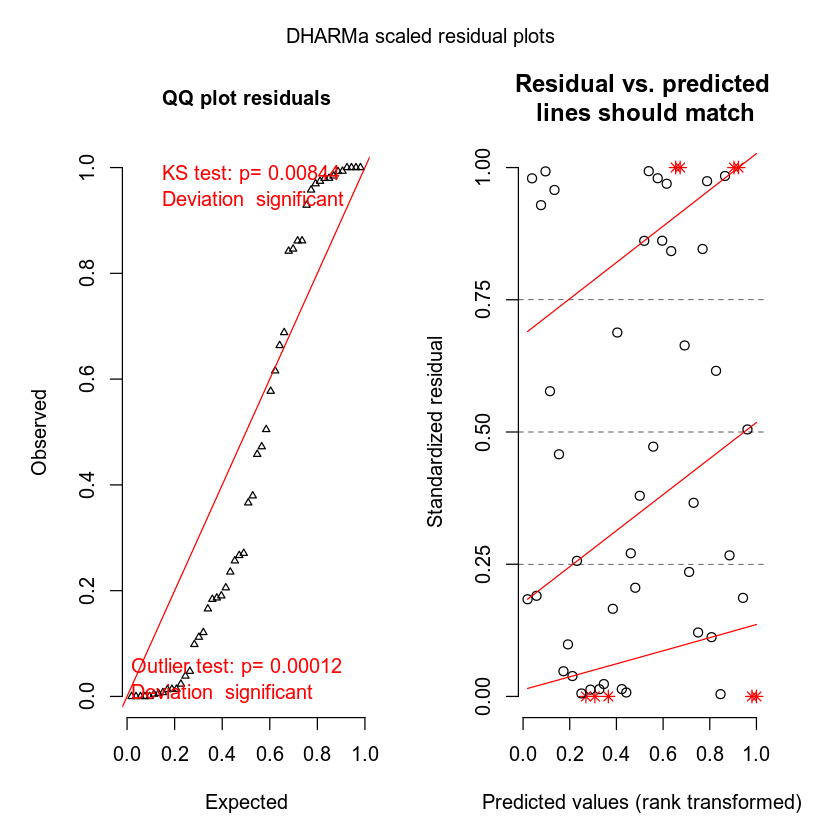

In [9]:
plot(simulateResiduals(glm1))

In [7]:
summary(glm1)


Call:
glm(formula = TOT.N ~ D.PARK, family = poisson, data = data_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.1100  -1.6950  -0.4708   1.4206   7.3337  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.316e+00  4.322e-02   99.87   <2e-16 ***
D.PARK      -1.059e-04  4.387e-06  -24.13   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 1071.4  on 51  degrees of freedom
Residual deviance:  390.9  on 50  degrees of freedom
AIC: 634.29

Number of Fisher Scoring iterations: 4


In [11]:
cat("Pseudo R^2 = ", (1071.4 - 390.9)/1071.4)

Pseudo R^2 =  0.6351503

We add more variables to this bare-bones model

In [12]:
data_df %>%
    mutate(SQ_POLIC = sqrt(POLIC),
           SQ_WATRES = sqrt(WAT.RES), 
           SQ_URBAN = sqrt(URBAN),
           SQ_OLIVE = sqrt(OLIVE),
           SQ_LPROAD = sqrt(L.P.ROAD),
           SQ_SHRUB = sqrt(SHRUB),
           SQ_DWATCOUR = sqrt(D.WAT.COUR)) ->
    data_df

In [14]:
nb_model1 = glm.nb(TOT.N ~ OPEN.L + MONT.S + SQ_POLIC + 
                   SQ_SHRUB + SQ_WATRES + L.WAT.C + SQ_LPROAD + SQ_DWATCOUR + D.PARK,
                   link = "log",
                   data = data_df)

In [15]:
stepAIC(nb_model1)

Start:  AIC=388.11
TOT.N ~ OPEN.L + MONT.S + SQ_POLIC + SQ_SHRUB + SQ_WATRES + L.WAT.C + 
    SQ_LPROAD + SQ_DWATCOUR + D.PARK

              Df    AIC
- SQ_DWATCOUR  1 386.11
- SQ_POLIC     1 386.25
- SQ_WATRES    1 387.06
- SQ_SHRUB     1 387.77
<none>           388.11
- MONT.S       1 388.73
- SQ_LPROAD    1 389.91
- L.WAT.C      1 390.34
- OPEN.L       1 394.03
- D.PARK       1 443.29

Step:  AIC=386.11
TOT.N ~ OPEN.L + MONT.S + SQ_POLIC + SQ_SHRUB + SQ_WATRES + L.WAT.C + 
    SQ_LPROAD + D.PARK

            Df    AIC
- SQ_POLIC   1 384.27
- SQ_WATRES  1 385.08
- SQ_SHRUB   1 385.77
<none>         386.11
- MONT.S     1 386.75
- SQ_LPROAD  1 387.91
- L.WAT.C    1 389.65
- OPEN.L     1 392.22
- D.PARK     1 441.87

Step:  AIC=384.27
TOT.N ~ OPEN.L + MONT.S + SQ_SHRUB + SQ_WATRES + L.WAT.C + SQ_LPROAD + 
    D.PARK

            Df    AIC
- SQ_WATRES  1 383.31
- SQ_SHRUB   1 383.89
<none>         384.27
- MONT.S     1 384.85
- SQ_LPROAD  1 385.93
- L.WAT.C    1 387.66
- OPEN.L     1 39


Call:  glm.nb(formula = TOT.N ~ OPEN.L + L.WAT.C + SQ_LPROAD + D.PARK, 
    data = data_df, init.theta = 4.979895134, link = "log")

Coefficients:
(Intercept)       OPEN.L      L.WAT.C    SQ_LPROAD       D.PARK  
  4.0319983   -0.0108517    0.1597154    0.4923970   -0.0001154  

Degrees of Freedom: 51 Total (i.e. Null);  47 Residual
Null Deviance:	    197.6 
Residual Deviance: 51.33 	AIC: 383.5

In [16]:
nb_model2 = glm.nb(TOT.N ~ OPEN.L + D.PARK,
                   link = "log",
                   data = data_df)

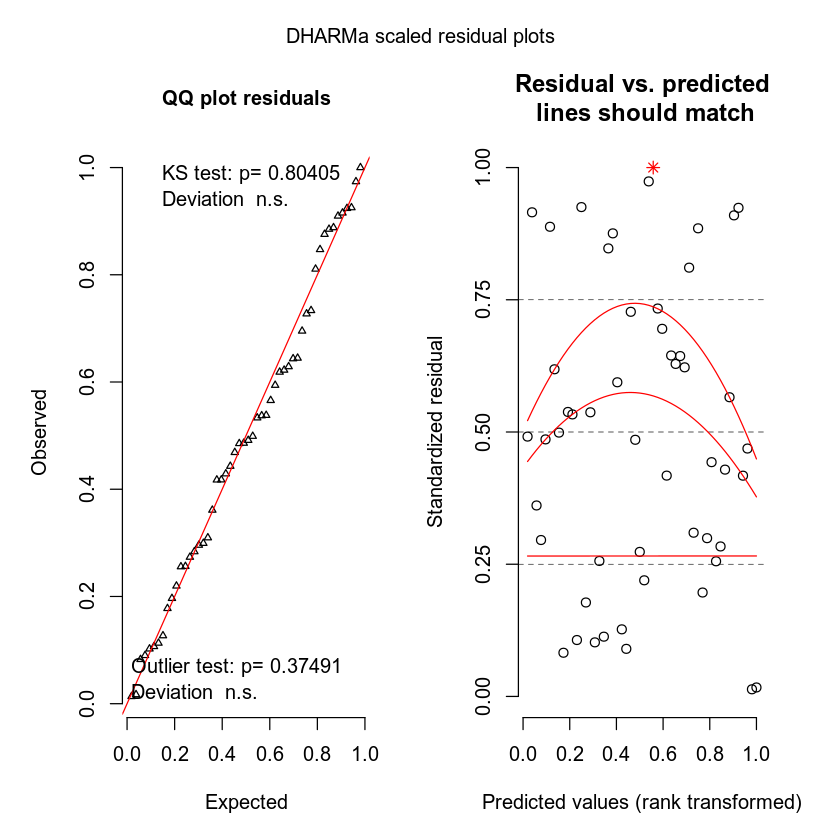

In [17]:
plot(simulateResiduals(nb_model2))

In [18]:
summary(nb_model2)


Call:
glm.nb(formula = TOT.N ~ OPEN.L + D.PARK, data = data_df, link = "log", 
    init.theta = 4.13284466)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5880  -0.7878  -0.1676   0.3721   2.4369  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.6717034  0.1641768  28.455   <2e-16 ***
OPEN.L      -0.0093591  0.0031952  -2.929   0.0034 ** 
D.PARK      -0.0001119  0.0000113  -9.901   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(4.1328) family taken to be 1)

    Null deviance: 170.661  on 51  degrees of freedom
Residual deviance:  51.839  on 49  degrees of freedom
AIC: 387.43

Number of Fisher Scoring iterations: 1


              Theta:  4.133 
          Std. Err.:  0.980 

 2 x log-likelihood:  -379.432 

# R environment

In [13]:
library(tidyverse)
library(nlme)
library(MASS)
library(DHARMa)


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



In [2]:
setwd("~/mixed-effects-models")

In [3]:
print(sessionInfo())

R version 3.6.1 (2019-07-05)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] nlme_3.1-141    forcats_0.4.0   stringr_1.4.0   dplyr_0.8.0.1  
 [5] purrr_0.3.2     readr_1.3.1     tidyr_0.8.3     tibble_2.1.1   
 [9] ggplot2_3.1.1   tidyverse_1.2.1

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.1          cellranger_1.1.0    plyr_1.8.4         
 [4] pillar_1.3.1        compiler_3.6.1     